In [ ]:
# This notebook loads Max's neural net 
# and eigendecomposes the graph laplacian

# import needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import scipy.linalg as linalg
import networkx as nx
import matplotlib.pyplot as plt

c:\Users\Xbrai\miniforge3\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Xbrai\miniforge3\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Xbrai\miniforge3\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Xbrai\miniforge3\envs\ml\lib\site-packages\tensorflow\python\framework

## load weights and biases

In [11]:
# load max's weights and biases
from load_params import *

In [ ]:
#now look at the sizes of each set of weights/biases
for weight in weights:
    print(weight.shape)

#params has elements weights_0, biases_0, weights_1, biases_1, weights_2, biases_2, weights_3, biases_3

(784, 128)
(128,)
(128, 64)
(64,)
(64, 28)
(28,)
(28, 10)
(10,)


## create adjacency matrix

the adjacency matrix will look like

        784 + 128 + 64 + 28 + 10
    784  0    W0    0    0    0
    +128 W0'   0    W1'  0    0
    +64  0    W1'   0    W2   0
    +28  0    0     W2'  0    W3
    +10  0    0     0    W3'  0

In [26]:
layer_sizes = np.array([784, 128, 64, 28, 10])
num_neurons = np.sum(layer_sizes) # = 1014

#construct the adjacency matrix
A = np.zeros(shape = (num_neurons, num_neurons))

# get the locations of each block
blocks = np.r_[0, np.cumsum(layer_sizes)]   # e.g. [0, 784, 912, 976, 1004, 1014]
print('the blocks are located at')
print(blocks)

# initialize adjacency
A = np.zeros((num_neurons, num_neurons))

# just load the weight matrices into the blocks 
for i in range(4):
    #first just load the upper triangular part of the adjacency matrix

    #get the rows for each block
    first_row = blocks[i]
    last_row = blocks[i+1] 
    #and the columns for each block
    first_col = blocks[i+1]
    last_col = blocks[i+2] 

    # now assign the weight matrix to that block
    A[first_row : last_row , first_col : last_col] = weights[i]

    # mirror to make A symmetric
    A[first_col : last_col , first_row : last_row] = weights[i].T

the blocks are located at
[   0  784  912  976 1004 1014]


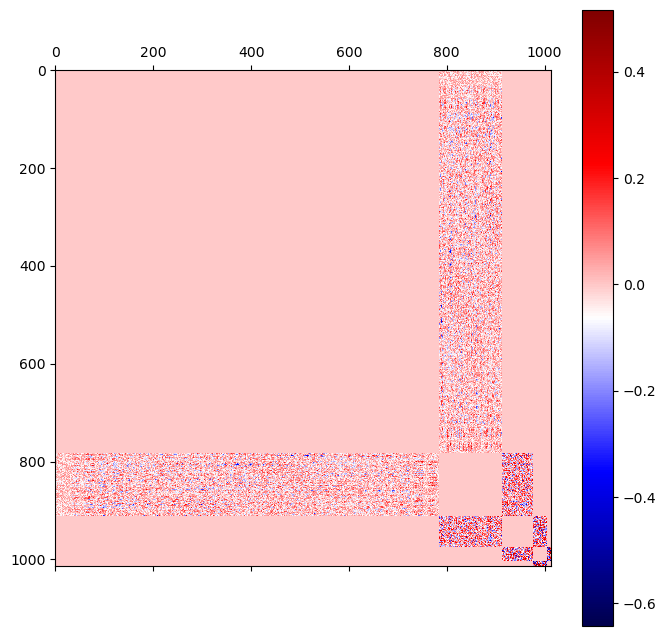

In [46]:
# plot heatmap of A

fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an Axes
cax = ax.matshow(A, cmap='seismic')  # Plot on the specified Axes
fig.colorbar(cax, ax=ax)  # Add colorbar to that Axes

plt.show()